In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('data.csv',header=None)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
import warnings
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.95


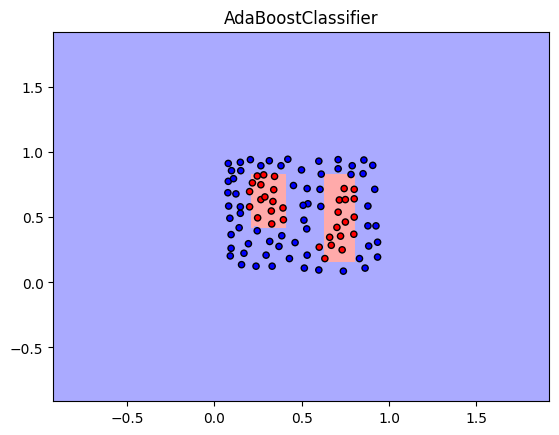

In [8]:
# plot the decision boundary
import numpy as np
from matplotlib.colors import ListedColormap
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
h=0.02
x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('AdaBoostClassifier')
plt.show()


In [10]:
# plot the decision boundary for the first learner
model=AdaBoostClassifier(n_estimators=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)


Accuracy: 0.55


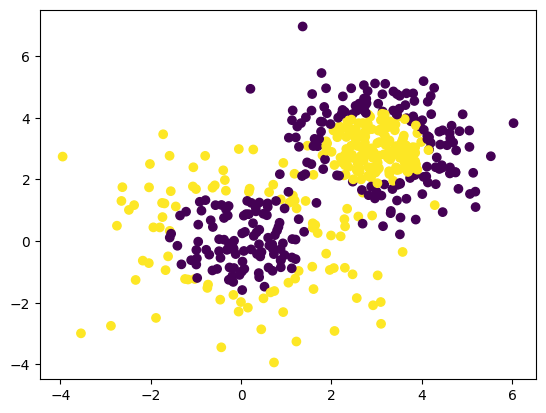

In [9]:
# plot the decision boundary by using the adaBoostClassifier step by step 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
X1,y1=make_gaussian_quantiles(cov=2,n_samples=200,n_features=2,n_classes=2,random_state=1)
X2,y2=make_gaussian_quantiles(mean=(3,3),cov=1,n_samples=300,n_features=2,n_classes=2,random_state=1)
X=np.concatenate((X1,X2))
y=np.concatenate((y1,-y2+1))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()